## Indo before preprocessing

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

df_indo = pd.read_csv("aes_dataset_5k_clean.csv")
df_indo = df_indo[df_indo['dataset'] == 'analisis_essay'].reset_index(drop=True)

df_indo['soal_num'] = df_indo['dataset_num'].str.extract(r'-(\d+)$').astype(int)
df_indo.loc[df_indo['soal_num'].between(1, 10), 'kategori'] = 'lifestyle'
df_indo.loc[df_indo['soal_num'].between(11, 20), 'kategori'] = 'olahraga'
df_indo.loc[df_indo['soal_num'].between(21, 30), 'kategori'] = 'politik'
df_indo.loc[df_indo['soal_num'].between(31, 40), 'kategori'] = 'teknologi'
df_indo.drop(columns=['multibert_length', 'soal_num'], inplace=True)

print(df_indo.info())
df_indo.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2162 entries, 0 to 2161
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   question          2162 non-null   object 
 1   reference_answer  2162 non-null   object 
 2   answer            2162 non-null   object 
 3   score             2162 non-null   float64
 4   normalized_score  2162 non-null   float64
 5   dataset           2162 non-null   object 
 6   dataset_num       2162 non-null   object 
 7   kategori          2162 non-null   object 
dtypes: float64(2), object(6)
memory usage: 135.2+ KB
None


,question,reference_answer,answer,score,normalized_score,dataset,dataset_num,kategori
0,Jelaskan kegunaan karbohidrat untuk tubuh kita.,Fungsi karbohidrat adalah sebagai pemasok ener...,"sumber tenaga, pemanis alami, menjaga sistem i...",27.0,0.27,analisis_essay,analisis_essay-1,lifestyle
1,Jelaskan kegunaan karbohidrat untuk tubuh kita.,Fungsi karbohidrat adalah sebagai pemasok ener...,"sebagai sumber energi, pemanis alami, menjaga ...",21.0,0.21,analisis_essay,analisis_essay-1,lifestyle
2,Jelaskan kegunaan karbohidrat untuk tubuh kita.,Fungsi karbohidrat adalah sebagai pemasok ener...,1. Sebagai energi. 2. Sebagai memperlancaar pe...,42.0,0.42,analisis_essay,analisis_essay-1,lifestyle
3,Jelaskan kegunaan karbohidrat untuk tubuh kita.,Fungsi karbohidrat adalah sebagai pemasok ener...,"untuk membuat kenyang, agar tidak lapar, agar ...",18.0,0.18,analisis_essay,analisis_essay-1,lifestyle
4,Jelaskan kegunaan karbohidrat untuk tubuh kita.,Fungsi karbohidrat adalah sebagai pemasok ener...,Karbohidrat mempunyai peran penting untuk pros...,82.0,0.82,analisis_essay,analisis_essay-1,lifestyle


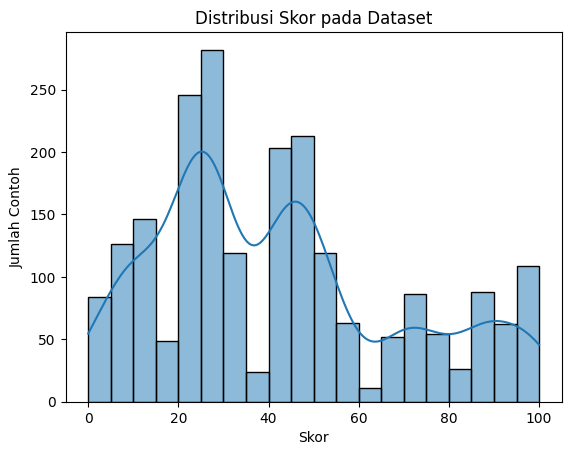

In [3]:
plt.figure()
sns.histplot(df_indo['score'], bins=20, kde=True)
plt.title('Distribusi Skor pada Dataset')
plt.xlabel('Skor')
plt.ylabel('Jumlah Contoh')
plt.show()

## Visualize distribution score after splitting

In [4]:
train = pd.read_csv("spesific/train_indo.csv")
valid = pd.read_csv("spesific/valid_indo.csv")
test = pd.read_csv("spesific/test_indo.csv")

train['kategori'] = 'specific-prompt'
train['split'] = 'Training'
valid['kategori'] = 'specific-prompt'
valid['split'] = 'Validation'
test['kategori'] = 'specific-prompt'
test['split'] = 'Testing'

df_specific = pd.concat([train, valid, test], axis=0, ignore_index=True)
df_specific.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2162 entries, 0 to 2161
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   question          2162 non-null   object 
 1   reference_answer  2162 non-null   object 
 2   answer            2162 non-null   object 
 3   score             2162 non-null   float64
 4   normalized_score  2162 non-null   float64
 5   dataset           2162 non-null   object 
 6   dataset_num       2162 non-null   object 
 7   kategori          2162 non-null   object 
 8   split             2162 non-null   object 
dtypes: float64(2), object(7)
memory usage: 152.1+ KB


In [5]:
train_df= pd.read_csv("cross/train_indo.csv")
val_df = pd.read_csv("cross/valid_indo.csv")
test_df = pd.read_csv("cross/test_indo.csv")

train_df['kategori'] = 'cross-prompt'
train_df['split'] = 'Training'
val_df['kategori'] = 'cross-prompt'
val_df['split'] = 'Validation'
test_df['kategori'] = 'cross-prompt'
test_df['split'] = 'Testing'

df_cross = pd.concat([train_df, val_df, test_df], axis=0, ignore_index=True)
df_cross.info()

df_full = pd.concat([df_specific, df_cross], axis=0, ignore_index=True)
df_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2162 entries, 0 to 2161
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   question          2162 non-null   object 
 1   reference_answer  2162 non-null   object 
 2   answer            2162 non-null   object 
 3   score             2162 non-null   float64
 4   normalized_score  2162 non-null   float64
 5   dataset           2162 non-null   object 
 6   dataset_num       2162 non-null   object 
 7   kategori          2162 non-null   object 
 8   soal_num          2162 non-null   int64  
 9   split             2162 non-null   object 
dtypes: float64(2), int64(1), object(7)
memory usage: 169.0+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4324 entries, 0 to 4323
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   question          4324 non-null   object 
 1   reference_an

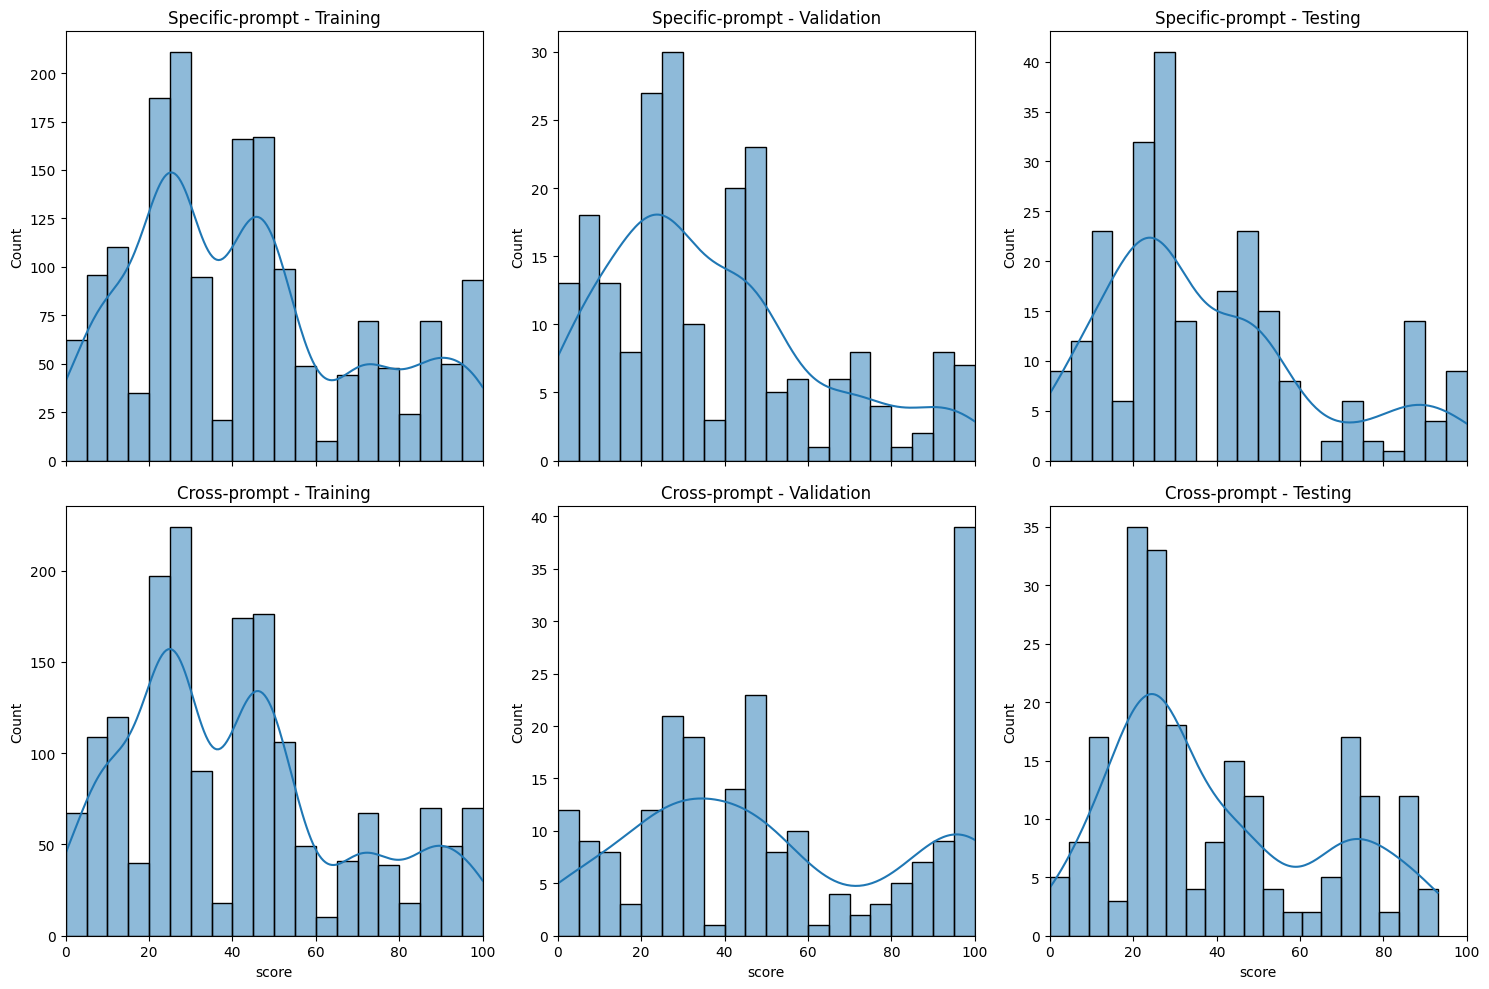

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(2, 3, figsize=(15, 10), sharex=True, sharey=False)
splits = ['Training', 'Validation', 'Testing']
categories = ['specific-prompt', 'cross-prompt']

for i, cat in enumerate(categories):
    for j, split in enumerate(splits):
        ax = axes[i, j]
        subset = df_full[(df_full['kategori'] == cat) & (df_full['split'] == split)]
        sns.histplot(subset['score'], bins=20, kde=True, ax=ax)
        ax.set_title(f"{cat.capitalize()} - {split}")
        ax.set_xlim(0, 100)

plt.tight_layout()
plt.show()

## Rahutomo after preprocessing

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

df_indo_after = pd.read_csv("rahutomo_clean.csv")
df_indo_after['normalized_score'] = df_indo_after['score'] / 100.0
print(df_indo_after.info())
print(len(df_indo_after['score'].unique()))
df_indo_after.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2008 entries, 0 to 2007
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   question          2008 non-null   object 
 1   reference_answer  2008 non-null   object 
 2   answer            2008 non-null   object 
 3   score             2008 non-null   int64  
 4   dataset           2008 non-null   object 
 5   dataset_num       2008 non-null   object 
 6   normalized_score  2008 non-null   float64
dtypes: float64(1), int64(1), object(5)
memory usage: 109.9+ KB
None
98


,question,reference_answer,answer,score,dataset,dataset_num,normalized_score
0,Jelaskan kegunaan karbohidrat untuk tubuh kita.,fungsi karbohidrat adalah sebagai pemasok ener...,membuat tubuh tahan banting agar membuat tubuh...,7,analisis_essay,analisis_essay-1,0.07
1,Jelaskan kegunaan karbohidrat untuk tubuh kita.,fungsi karbohidrat adalah sebagai pemasok ener...,karbohidrat untuk menambah energi bagi tubuh kita,20,analisis_essay,analisis_essay-1,0.20
2,Jelaskan kegunaan karbohidrat untuk tubuh kita.,fungsi karbohidrat adalah sebagai pemasok ener...,karbohidrat untuk tubuh kita berguna untuk sum...,21,analisis_essay,analisis_essay-1,0.21
3,Jelaskan kegunaan karbohidrat untuk tubuh kita.,fungsi karbohidrat adalah sebagai pemasok ener...,menjaga metabolisme tubuh menjaga menjaga stam...,13,analisis_essay,analisis_essay-1,0.13
4,Jelaskan kegunaan karbohidrat untuk tubuh kita.,fungsi karbohidrat adalah sebagai pemasok ener...,1 sebagai energi 2 sebagai memperlancaar pence...,42,analisis_essay,analisis_essay-1,0.42


In [25]:
df_indo_after['score'] = df_indo_after['score'].apply(round)
df_indo_after.to_csv("rahutomo_clean.csv", index=False)

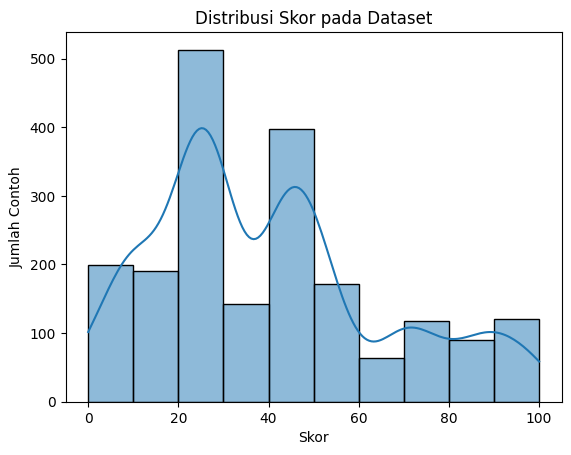

In [27]:
plt.figure()
sns.histplot(df_indo_after['score'], bins=10, kde=True)
plt.title('Distribusi Skor pada Dataset')
plt.xlabel('Skor')
plt.ylabel('Jumlah Contoh')
plt.show()

# Split Specific-prompt dataset

In [ ]:
from sklearn.model_selection import train_test_split
import pandas as pd

def split_dataset(df, train_ratio, valid_ratio, test_ratio):
    # ambil nomor soal
    subset_dataset = df['dataset_num'].unique()
    splits = {}
    for subset in subset_dataset:
        # ambil data dari setiap soal
        subset_df = df[df['dataset_num'] == subset]

        # split dataset
        train_df, temp_df = train_test_split(subset_df, test_size=(1 - train_ratio), random_state=42, shuffle=True)
        valid_df, test_df = train_test_split(temp_df, test_size=test_ratio / (valid_ratio + test_ratio), random_state=42, shuffle=True)

        # save data setiap soal
        splits[subset] = {
            'train': train_df,
            'valid': valid_df,
            'test': test_df,
        }
    
    # concat data
    train_dataset = pd.concat([splits[subset]['train'] for subset in subset_dataset])
    valid_dataset = pd.concat([splits[subset]['valid'] for subset in subset_dataset])
    test_dataset = pd.concat([splits[subset]['test'] for subset in subset_dataset])

    return train_dataset, valid_dataset, test_dataset

df_indo = pd.read_csv("rahutomo_clean.csv")
print(df_indo.info())
train, valid, test = split_dataset(df_indo, 0.8, 0.1, 0.1)
train.to_csv("clean/spesific/train_indo.csv", index=False)
valid.to_csv("clean/spesific/valid_indo.csv", index=False)
test.to_csv("clean/spesific/test_indo.csv", index=False)
print(train.info())
print(valid.info())
print(test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2008 entries, 0 to 2007
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   question          2008 non-null   object 
 1   reference_answer  2008 non-null   object 
 2   answer            2008 non-null   object 
 3   score             2008 non-null   int64  
 4   dataset           2008 non-null   object 
 5   dataset_num       2008 non-null   object 
 6   normalized_score  2008 non-null   float64
dtypes: float64(1), int64(1), object(5)
memory usage: 109.9+ KB
None
<class 'pandas.core.frame.DataFrame'>
Index: 1588 entries, 34 to 1991
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   question          1588 non-null   object 
 1   reference_answer  1588 non-null   object 
 2   answer            1588 non-null   object 
 3   score             1588 non-null   int64  
 4   dataset      

In [29]:
print(len(train['dataset_num'].unique()))
print(len(valid['dataset_num'].unique()))
print(len(test['dataset_num'].unique()))

40
40
40


In [30]:
train['kategori'] = 'specific-prompt'
train['split'] = 'Training'
valid['kategori'] = 'specific-prompt'
valid['split'] = 'Validation'
test['kategori'] = 'specific-prompt'
test['split'] = 'Testing'

df_specific = pd.concat([train, valid, test], axis=0, ignore_index=True)
df_specific.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2008 entries, 0 to 2007
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   question          2008 non-null   object 
 1   reference_answer  2008 non-null   object 
 2   answer            2008 non-null   object 
 3   score             2008 non-null   int64  
 4   dataset           2008 non-null   object 
 5   dataset_num       2008 non-null   object 
 6   normalized_score  2008 non-null   float64
 7   kategori          2008 non-null   object 
 8   split             2008 non-null   object 
dtypes: float64(1), int64(1), object(7)
memory usage: 141.3+ KB


# Split cross-prompt dataset

In [ ]:
df_indo = pd.read_csv("rahutomo_clean.csv")
print(df_indo.info())
df_indo['soal_num'] = df_indo['dataset_num'].str.extract(r'-(\d+)$').astype(int)
df_indo.loc[df_indo['soal_num'].between(1, 10), 'kategori'] = 'lifestyle'
df_indo.loc[df_indo['soal_num'].between(11, 20), 'kategori'] = 'olahraga'
df_indo.loc[df_indo['soal_num'].between(21, 30), 'kategori'] = 'politik'
df_indo.loc[df_indo['soal_num'].between(31, 40), 'kategori'] = 'teknologi'
train_parts = []
val_parts = []
test_parts = []

for kategori, group in df_indo.groupby('kategori'):
    # ambil nomor soal dari setiap kategori
    soal_ids = group['soal_num'].unique()
    
    # ambil 8 soal untuk training, 1 validasi, 1 test
    train_ids, temp_ids = train_test_split(soal_ids, test_size=0.2, random_state=42)
    val_ids, test_ids = train_test_split(temp_ids, test_size=0.5, random_state=42)
    
    # ambil data berdasarkan nomor soal
    train_parts.append(group[group['soal_num'].isin(train_ids)])
    val_parts.append(group[group['soal_num'].isin(val_ids)])
    test_parts.append(group[group['soal_num'].isin(test_ids)])

train_df = pd.concat(train_parts).reset_index(drop=True)
val_df = pd.concat(val_parts).reset_index(drop=True)
test_df = pd.concat(test_parts).reset_index(drop=True)

train_df.to_csv("clean/cross/train_indo.csv", index=False)
val_df.to_csv("clean/cross/valid_indo.csv", index=False)
test_df.to_csv("clean/cross/test_indo.csv", index=False)
print(len(train_df['question'].unique()))
print(len(val_df['question'].unique()))
print(len(test_df['question'].unique()))
print(len(train_df['question']))
print(len(val_df['question']))
print(len(test_df['question']))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2008 entries, 0 to 2007
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   question          2008 non-null   object 
 1   reference_answer  2008 non-null   object 
 2   answer            2008 non-null   object 
 3   score             2008 non-null   int64  
 4   dataset           2008 non-null   object 
 5   dataset_num       2008 non-null   object 
 6   normalized_score  2008 non-null   float64
dtypes: float64(1), int64(1), object(5)
memory usage: 109.9+ KB
None
32
4
4
1618
182
208


In [33]:
train_df['kategori'] = 'cross-prompt'
train_df['split'] = 'Training'
val_df['kategori'] = 'cross-prompt'
val_df['split'] = 'Validation'
test_df['kategori'] = 'cross-prompt'
test_df['split'] = 'Testing'

df_cross = pd.concat([train_df, val_df, test_df], axis=0, ignore_index=True)
df_cross.info()

df_full = pd.concat([df_specific, df_cross], axis=0, ignore_index=True)
df_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2008 entries, 0 to 2007
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   question          2008 non-null   object 
 1   reference_answer  2008 non-null   object 
 2   answer            2008 non-null   object 
 3   score             2008 non-null   int64  
 4   dataset           2008 non-null   object 
 5   dataset_num       2008 non-null   object 
 6   normalized_score  2008 non-null   float64
 7   soal_num          2008 non-null   int32  
 8   kategori          2008 non-null   object 
 9   split             2008 non-null   object 
dtypes: float64(1), int32(1), int64(1), object(7)
memory usage: 149.2+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4016 entries, 0 to 4015
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   question          4016 non-null   object 
 1   re

## Score distribution

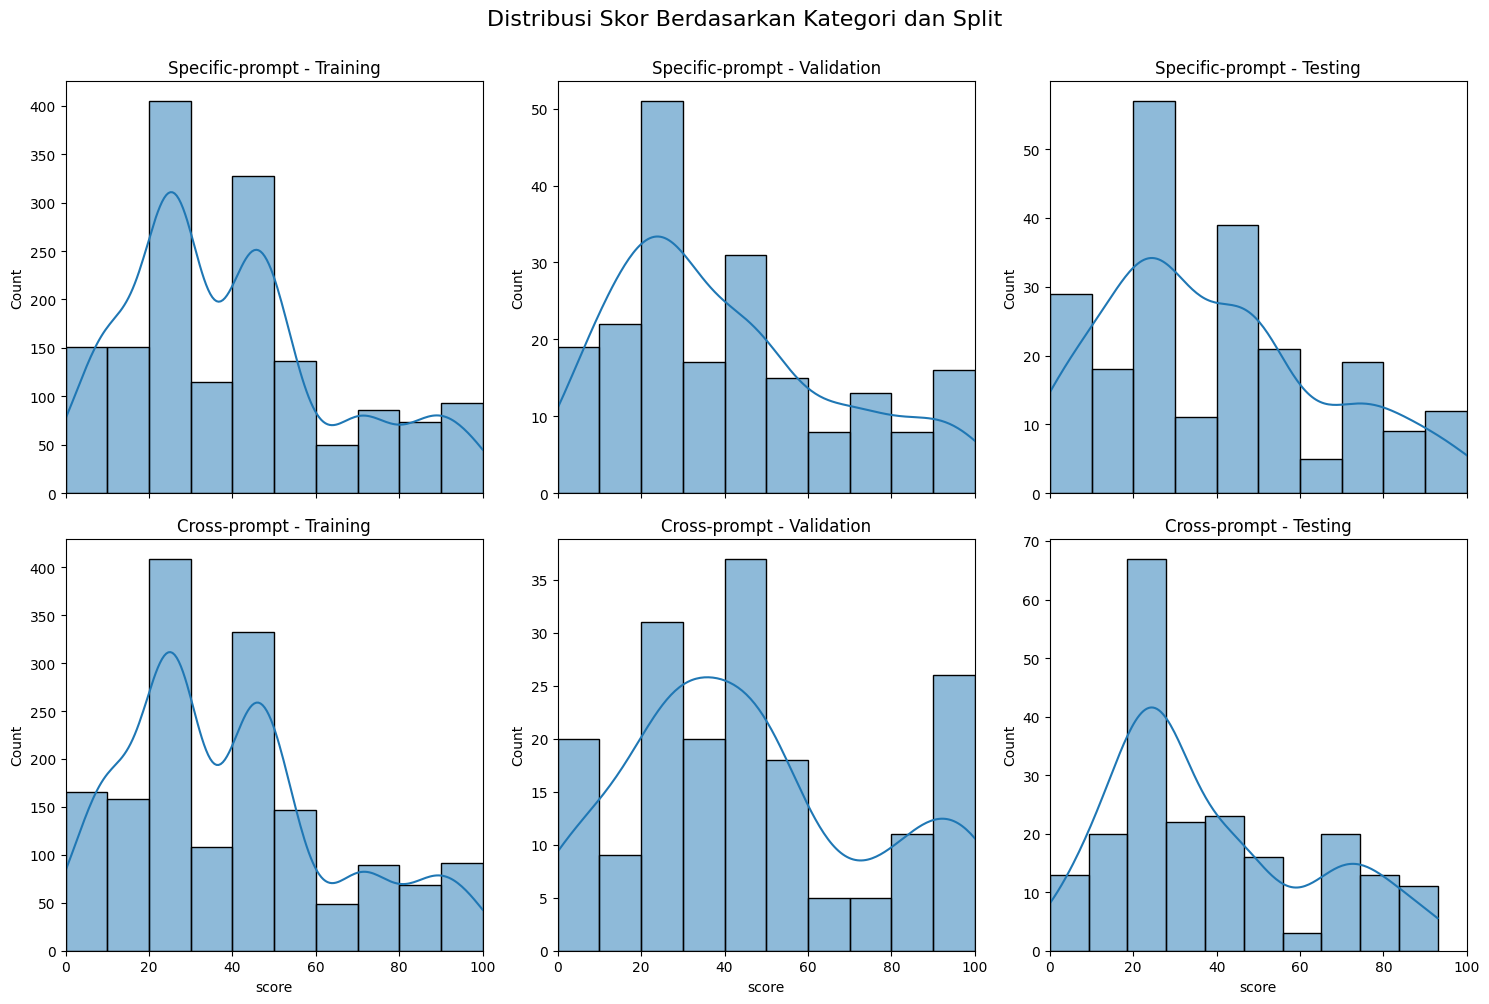

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(2, 3, figsize=(15, 10), sharex=True, sharey=False)
splits = ['Training', 'Validation', 'Testing']
categories = ['specific-prompt', 'cross-prompt']

for i, cat in enumerate(categories):
    for j, split in enumerate(splits):
        ax = axes[i, j]
        subset = df_full[(df_full['kategori'] == cat) & (df_full['split'] == split)]
        sns.histplot(subset['score'], bins=10, kde=True, ax=ax)
        ax.set_title(f"{cat.capitalize()} - {split}")
        ax.set_xlim(0, 100)

fig.suptitle("Distribusi Skor Berdasarkan Kategori dan Split", fontsize=16, y=1)
plt.tight_layout()
plt.show()

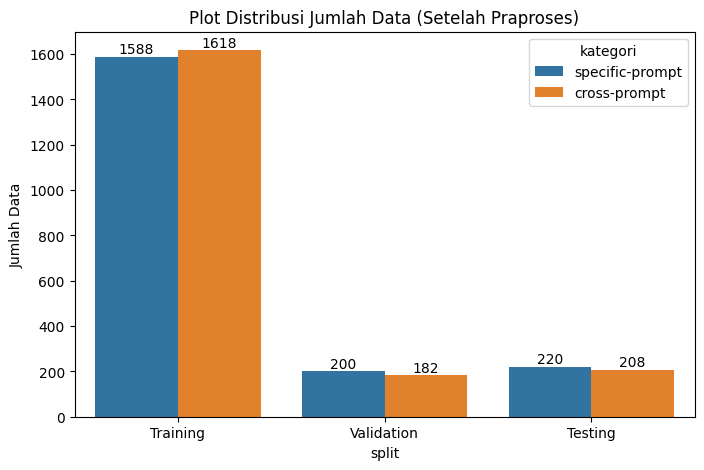

In [ ]:
plt.figure(figsize=(8, 5))

ax = sns.countplot(data=df_full, x='split', hue='kategori')

# beri label
for container in ax.containers:
    ax.bar_label(container)

plt.title('Plot Distribusi Jumlah Data (Setelah Praproses)')
plt.ylabel('Jumlah Data')
plt.show()


## After Balancing

In [2]:
import pandas as pd

df_train_cross = pd.read_csv("clean/cross/train_indo.csv")
df_train_cross['tipe'] = 'cross-prompt'
df_train_cross['balance'] = 'sebelum'
df_train_cross_balance = pd.read_csv("clean/cross/train_indo_balanced.csv")
df_train_cross_balance['tipe'] = 'cross-prompt'
df_train_cross_balance['balance'] = 'sesudah'
df_train_specific = pd.read_csv("clean/spesific/train_indo.csv")
df_train_specific['tipe'] = 'specific-prompt'
df_train_specific['balance'] = 'sebelum'
df_train_specific_balance = pd.read_csv("clean/spesific/train_indo_balanced.csv")
df_train_specific_balance['tipe'] = 'specific-prompt'
df_train_specific_balance['balance'] = 'sesudah'

df = pd.concat([df_train_cross, df_train_cross_balance, df_train_specific, df_train_specific_balance], axis=0, ignore_index=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10591 entries, 0 to 10590
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   question          10591 non-null  object 
 1   reference_answer  10591 non-null  object 
 2   answer            10591 non-null  object 
 3   score             10591 non-null  int64  
 4   dataset           10591 non-null  object 
 5   dataset_num       10591 non-null  object 
 6   normalized_score  10591 non-null  float64
 7   soal_num          5268 non-null   float64
 8   kategori          5268 non-null   object 
 9   tipe              10591 non-null  object 
 10  balance           10591 non-null  object 
 11  before            7385 non-null   object 
 12  score_bin         7385 non-null   object 
dtypes: float64(2), int64(1), object(10)
memory usage: 1.1+ MB


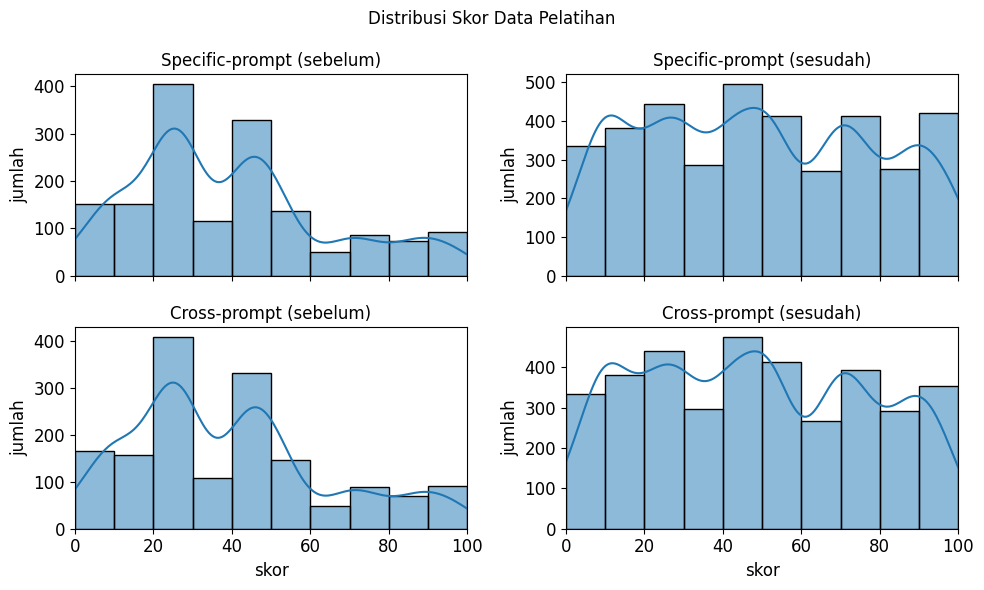

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams.update({'font.size': 12})

fig, axes = plt.subplots(2, 2, figsize=(10, 6), sharex=True, sharey=False)
balances = ['sebelum', 'sesudah']
tipes = ['specific-prompt', 'cross-prompt']

for i, tipe in enumerate(tipes):
    for j, balance in enumerate(balances):
        ax = axes[i][j]
        subset = df[(df['tipe'] == tipe) & (df['balance'] == balance)]

        if not subset.empty:
            sns.histplot(subset['score'], bins=10, kde=True, ax=ax)
            ax.set_title(f"{tipe.capitalize()} ({balance})", fontsize=12)
            ax.set_xlim(0, 100)
            ax.set_xlabel("skor", fontsize=12)
            ax.set_ylabel("jumlah", fontsize=12)
        else:
            ax.set_title(f"{tipe.capitalize()} ({balance})\n(No Data)", fontsize=12)
            ax.axis('off')

fig.suptitle("Distribusi Skor Data Pelatihan", fontsize=12)
plt.tight_layout()
plt.show()
